In [9]:
# importing pandas, numpy and some visualisation libraries needed for plots.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, download_plotlyjs,plot,iplot
import plotly.express as px
%matplotlib inline
cf.go_offline()

init_notebook_mode(connected=True)

In [8]:
#The data for each season is going to be read using the read csv method into distinct dataframes. Then, we add them all together using. concat() technique
pl16 = pd.read_csv(r'C:\Users\kenke\OneDrive - AN POST\Courses\Data Analytics\pl_15-16.csv')
pl17 = pd.read_csv(r'C:\Users\kenke\OneDrive - AN POST\Courses\Data Analytics\pl_16-17.csv')
pl18 = pd.read_csv(r'C:\Users\kenke\OneDrive - AN POST\Courses\Data Analytics\pl_17-18.csv')
pl19 = pd.read_csv(r'C:\Users\kenke\OneDrive - AN POST\Courses\Data Analytics\pl_18-19.csv')
pl20 = pd.read_csv(r'C:\Users\kenke\OneDrive - AN POST\Courses\Data Analytics\pl_19-20.csv')

pl16['Year']='2015/16'  
pl17['Year']='2016/17'
pl18['Year']='2017/18'
pl19['Year']='2018/19'
pl20['Year']='2019/20'

In [7]:
#Combine all the data sets into one data set using the .concat() method
pl_upto20 = pd.concat([pl16, pl17, pl18, pl19, pl20])


In [6]:
# Print the head of the data set
pl16.head()

,Unnamed: 0,Name,Position,Appearances,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,...,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Year,Involvements
0,0,Rolando Aarons,Midfielder,10,NaN,NaN,13.0,77%,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015/16,2
1,1,Almen Abdi,Midfielder,32,NaN,NaN,83.0,78%,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015/16,2
2,2,Abdul Rahman Baba,Defender,15,2.0,13.0,47.0,83%,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015/16,1
4,4,Tammy Abraham,Forward,2,NaN,NaN,0.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015/16,0
5,5,Charlie Adam,Midfielder,22,NaN,NaN,18.0,78%,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015/16,2


In [10]:
#Remove all players that didn't make a single appearance in the 2015/16 season and then plot the top goalscorers.

pl16 = pl16[pl16['Appearances']!=0]

goalscorers = pl16.nlargest(5, ['Goals'])

goalscorers.iplot(kind='bar',x='Name',y='Goals',title='Top Goalscorers - 15/16', xTitle='Players', yTitle='Goals',color='red')


In [5]:
# Then I analysed the top assist providors 
playmakers = pl16.nlargest(5, ['Assists'])

playmakers.iplot(kind='bar', x='Name', y='Assists',title='Top Playmakers(Assist providers) - 15/16',xTitle='Players',yTitle='Goals',color='maroon',theme='solar')


In [16]:
#Creating a new column 'Assists'

pl16['Involvements'] = pl16['Goals'] + pl16['Assists']

# Selecting 5 players with the highest goal involvements

involvements = pl16.nlargest(5, 'Involvements')

involvements.iplot(x='Name',y='Involvements',title='Players with highest Goal Assists - 15/16 '
                   ,xTitle='Players',yTitle='Goal Assists')


    

In [12]:
#Extracting data of all midfielders first and then isolating Kanté

midfielders16 = pl16[pl16['Position']=='Midfielder']

kante16 = midfielders16[midfielders16['Name']=="N'Golo Kanté "]

# Creating a series of midfielders who make top 10 in the number of Interceptions, Duels and then Tackles.

interceptions = midfielders16.nlargest(10, 'Interceptions')[['Name','Interceptions']]
duels  = midfielders16.nlargest(10, 'Duels won')[['Name','Duels won']]
tackles = midfielders16.nlargest(10, 'Tackles')[['Name', 'Tackles']]

for i in [interceptions, duels, tackles]:
    print(i,"\n")
    

                Name  Interceptions
367    N'Golo Kanté           156.0
285   Idrissa Gueye           141.0
108    Yohan Cabaye           120.0
746   Claudio Yacob           118.0
662   Andrew Surman           109.0
422     Yann M'Vila            86.0
154       Jack Cork            83.0
498      Mark Noble            83.0
115  Etienne Capoue            82.0
191       Eric Dier            80.0 

                  Name  Duels won
285     Idrissa Gueye       295.0
367      N'Golo Kanté       277.0
56       Ross Barkley       250.0
184     Mousa Dembélé       249.0
388  Cheikhou Kouyaté       248.0
115    Etienne Capoue       235.0
635    Moussa Sissoko       221.0
92       Robbie Brady       211.0
231       Fernandinho       210.0
154         Jack Cork       209.0 

                   Name  Tackles
367       N'Golo Kanté     175.0
285      Idrissa Gueye     144.0
418        Lucas Leiva     108.0
746      Claudio Yacob     108.0
108       Yohan Cabaye     107.0
206  Daniel Drinkwater     1

In [13]:
#Making a dataframe with only defenders
defenders = pl16[pl16['Position']=='Defender']

#Selecting defenders with more than 30 appearances and making a new column 'Conceded per game',
#which is Goals conceded/Appearances.

top_def_stats = defenders[defenders['Appearances']>30]

top_def_stats['Conceded per game'] = top_def_stats['Goals conceded']/top_def_stats['Appearances']
least_conceded = top_def_stats.nsmallest(5, 'Conceded per game')

least_conceded.iplot(kind='bubble',x='Name',y='Conceded per game',size='Clean sheets', title='Goals conceded per game')


In [14]:
#Pulling data on Kasper Schmichael

goalkeepers = pl16[pl16['Position']=='Goalkeeper']

goalkeepers[goalkeepers['Name']=='Kasper Schmeichel ']


,Unnamed: 0,Name,Position,Appearances,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,...,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Year,Involvements
614,614,Kasper Schmeichel,Goalkeeper,38,15.0,36.0,NaN,NaN,NaN,NaN,...,99.0,0.0,22.0,47.0,15.0,46.0,82.0,324.0,2015/16,0


In [15]:
#Comparing him with other keepers with similar appearances.
goalkeepers = goalkeepers[goalkeepers['Appearances']>=36]

goalkeepers[['Name','Appearances','Clean sheets', 'Goals conceded','Saves']]

,Name,Appearances,Clean sheets,Goals conceded,Saves
222,Lukasz Fabianski,37,9.0,51.0,115.0
302,Heurelho Gomes,38,11.0,49.0,121.0
413,Hugo Lloris,37,13.0,34.0,88.0
614,Kasper Schmeichel,38,15.0,36.0,99.0


In [17]:
# Part 2 Liverpool climbing back on their perch!!

In [18]:
#I'll analyse the data for Liverpool's three front players who are the main contributors in terms of goals.

salah18 = pl18[pl18['Name']=='Mohamed Salah ']
firmino18 = pl18[pl18['Name']=='Roberto Firmino ']
mane18 = pl18[pl18['Name']=='Sadio Mané ']

liverpool_trio18 = pd.concat([salah18, mane18, firmino18])

######################################################

salah19 = pl19[pl19['Name']=='Mohamed Salah ']
firmino19 = pl19[pl19['Name']=='Roberto Firmino ']
mane19 = pl19[pl19['Name']=='Sadio Mané ']

liverpool_trio19 = pd.concat([salah19, mane19, firmino19])

#####################################################

salah20 = pl20[pl20['Name']=='Mohamed Salah ']
firmino20 = pl20[pl20['Name']=='Roberto Firmino ']
mane20 = pl20[pl20['Name']=='Sadio Mané ']

liverpool_trio20 = pd.concat([salah20, mane20, firmino20])

In [19]:
# Then I will display the information in three seperate tables
i=2018
for dfs in [liverpool_trio18, liverpool_trio19, liverpool_trio20]:
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("\n\t\t{}\n\n{}\n\n\t\t  Total = {}".format(i,dfs[['Name', 'Goals']], dfs['Goals'].sum()))
    i+=1

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

		2018

                 Name  Goals
504    Mohamed Salah      32
452       Sadio Mané      10
623  Roberto Firmino      15

		  Total = 57
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

		2019

                 Name  Goals
566    Mohamed Salah      22
509       Sadio Mané      22
690  Roberto Firmino      12

		  Total = 56
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

		2020

                 Name  Goals
623    Mohamed Salah      19
560       Sadio Mané      18
758  Roberto Firmino       9

		  Total = 46


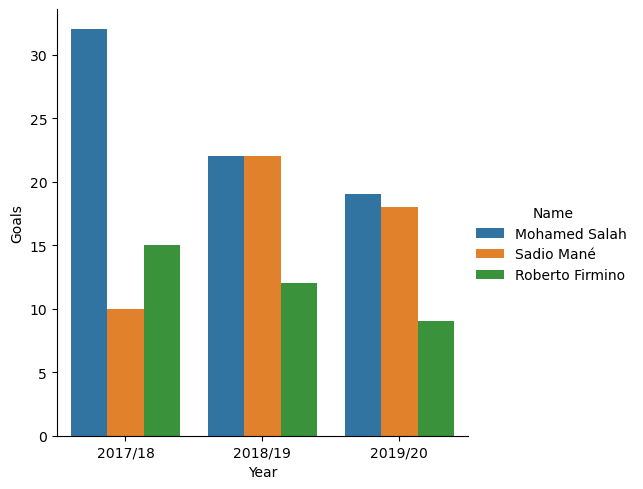

In [20]:
# Then I will plot this data in a bar plot
liverpool_trio = pd.concat([liverpool_trio18, liverpool_trio19, liverpool_trio20])

g = sns.catplot(x = 'Year', y = 'Goals', hue='Name', 
                kind='bar', data=liverpool_trio) 